   # Detecting Fetal Heart Condition with ML using Cardiotocogram data

![](https://media.giphy.com/media/nrNobmND75oRy/giphy.gif)

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

### Import data and perform initial cleaning on it

In [2]:
data = pd.read_excel('CTG.xls', 'Raw Data')
data.head()

description = pd.read_excel('CTG.xls', 'Description', skiprows=5)
description.columns

description.head()
columnNames = description
columnNames = description[['Unnamed: 2', 'Unnamed: 3']]
columnNames = columnNames[:39]
columnNames = columnNames.T
columnNames # Obtained a columName df
data.head()
data = data.drop('SegFile', 1) # Removed the column that wasn't common
data.head()

,FileName,Date,b,e,LBE,LB,AC,FM,UC,ASTV,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Variab10.txt,1996-12-01,240.0,357.0,120.0,120.0,0.0,0.0,0.0,73.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,Fmcs_1.txt,1996-05-03,5.0,632.0,132.0,132.0,4.0,0.0,4.0,17.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,1996-05-03,177.0,779.0,133.0,133.0,2.0,0.0,5.0,16.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,1996-05-03,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,16.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0


### Extracting column names from the data dictionary for easy reference of what the column indicates

In [3]:
columnList = columnNames[1:].values.tolist() # converting from dataframe to list for renaming puposes
len(columnList[0]) # selecting the first element of the list that contains the column names

data.columns = data.columns[:0].tolist() + columnList[0] # replacing the columnNames from original dataframe with new names
data.head()

    

,of CTG examination,of the examination,start instant,end instant,baseline value (medical expert),baseline value (SisPorto),accelerations (SisPorto),foetal movement (SisPorto),uterine contractions (SisPorto),percentage of time with abnormal short term variability (SisPorto),...,calm vigilance,active vigilance,shift pattern (A or Susp with shifts),accelerative/decelerative pattern (stress situation),decelerative pattern (vagal stimulation),largely decelerative pattern,flat-sinusoidal pattern (pathological state),suspect pattern,Class code (1 to 10) for classes A to SUSP,Normal=1; Suspect=2; Pathologic=3
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Variab10.txt,1996-12-01,240.0,357.0,120.0,120.0,0.0,0.0,0.0,73.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,Fmcs_1.txt,1996-05-03,5.0,632.0,132.0,132.0,4.0,0.0,4.0,17.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,1996-05-03,177.0,779.0,133.0,133.0,2.0,0.0,5.0,16.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,1996-05-03,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,16.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0


### Dropping null values if exists

In [4]:
data.dropna(inplace=True)
data.columns

Index(['of CTG examination', 'of the examination', 'start instant',
       'end instant', 'baseline value (medical expert)',
       'baseline value (SisPorto)', 'accelerations (SisPorto)',
       'foetal movement (SisPorto)', 'uterine contractions (SisPorto)',
       'percentage of time with abnormal short term variability  (SisPorto)',
       'mean value of short term variability  (SisPorto)',
       'percentage of time with abnormal long term variability  (SisPorto)',
       'mean value of long term variability  (SisPorto)',
       'light decelerations', 'severe decelerations',
       'prolongued decelerations', 'repetitive decelerations',
       'histogram width', 'low freq. of the histogram',
       'high freq. of the histogram', 'number of histogram peaks',
       'number of histogram zeros', 'histogram mode', 'histogram mean',
       'histogram median', 'histogram variance',
       'histogram tendency: -1=left assymetric; 0=symmetric; 1=right assymetric',
       'calm sleep', 'RE

### The dataset consists of 10-class and a 3 class classification results
1. I created 3 subsets for finding correlations with the results
    subset1 consists of all the readings of the cardiotocograpth and the 3-class classification column
    
2. subset 2 consists of all the readings of the cardiotocograph and the 10-class classification distinct columns

3. subset3 is similar to subset 2

In [5]:
subset1 = data[['baseline value (medical expert)',
       'baseline value (SisPorto)', 'accelerations (SisPorto)',
       'foetal movement (SisPorto)', 'uterine contractions (SisPorto)',
       'percentage of time with abnormal short term variability  (SisPorto)',
       'mean value of short term variability  (SisPorto)',
       'percentage of time with abnormal long term variability  (SisPorto)',
       'mean value of long term variability  (SisPorto)',
       'light decelerations', 'severe decelerations',
       'prolongued decelerations', 'repetitive decelerations','Normal=1; Suspect=2; Pathologic=3']]

subset2 = data[['baseline value (medical expert)',
       'baseline value (SisPorto)', 'accelerations (SisPorto)',
       'foetal movement (SisPorto)', 'uterine contractions (SisPorto)',
       'percentage of time with abnormal short term variability  (SisPorto)',
       'mean value of short term variability  (SisPorto)',
       'percentage of time with abnormal long term variability  (SisPorto)',
       'mean value of long term variability  (SisPorto)',
       'light decelerations', 'severe decelerations',
       'prolongued decelerations', 'repetitive decelerations','calm sleep', 'REM sleep', 'calm vigilance', 'active vigilance',
       'shift pattern (A or Susp with shifts)',
       'accelerative/decelerative pattern (stress situation)',
       'decelerative pattern (vagal stimulation)',
       'largely decelerative pattern',
       'flat-sinusoidal pattern (pathological state)', 'suspect pattern',
       'Class code (1 to 10) for classes A to SUSP']]

subset3 = data[['baseline value (medical expert)',
       'baseline value (SisPorto)', 'accelerations (SisPorto)',
       'foetal movement (SisPorto)', 'uterine contractions (SisPorto)',
       'percentage of time with abnormal short term variability  (SisPorto)',
       'mean value of short term variability  (SisPorto)',
       'percentage of time with abnormal long term variability  (SisPorto)',
       'mean value of long term variability  (SisPorto)',
       'light decelerations', 'severe decelerations',
       'prolongued decelerations', 'repetitive decelerations','Class code (1 to 10) for classes A to SUSP']]

### Plotting correlations for the 3 subsets

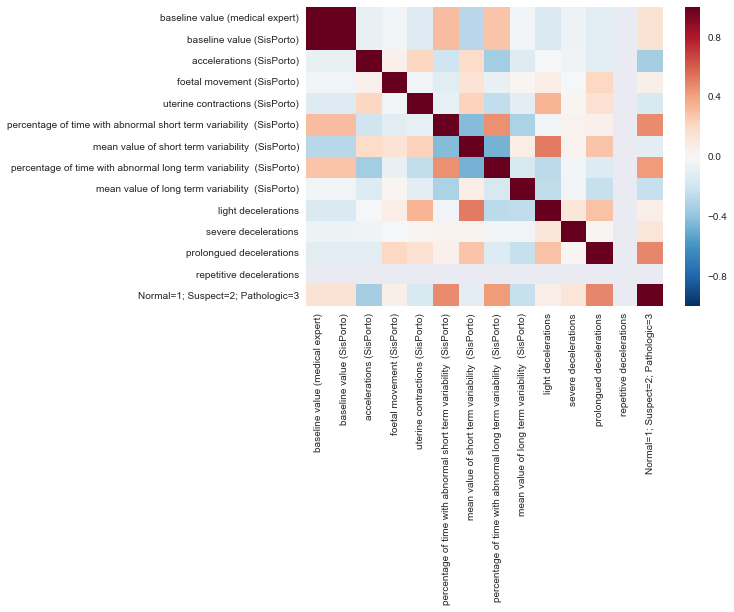

In [6]:
subser1corr = subset1.corr()                        
sns.heatmap(subser1corr)
sns.plt.show()

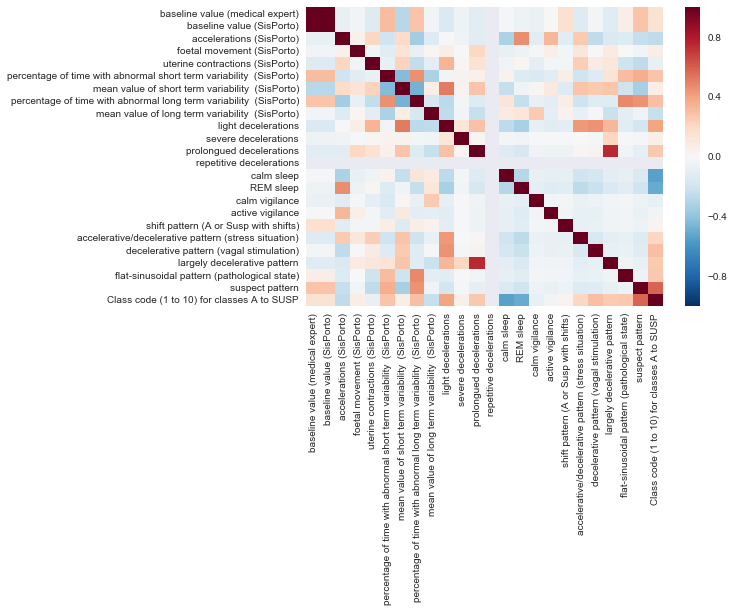

In [7]:
subser2corr = subset2.corr()                        
sns.heatmap(subser2corr)
sns.plt.show()

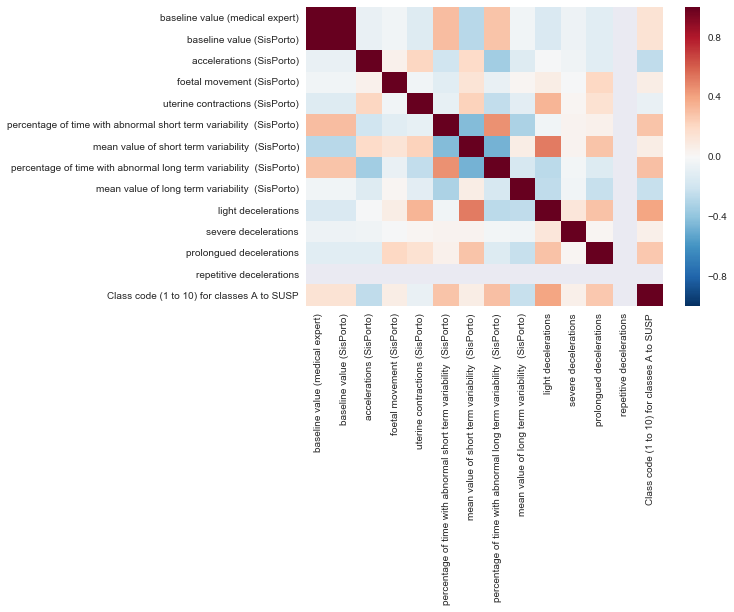

In [8]:
subset3corr = subset3.corr()                        
sns.heatmap(subset3corr)
sns.plt.show()

### Checking the relationship between the 10-class and the 3 class classifications

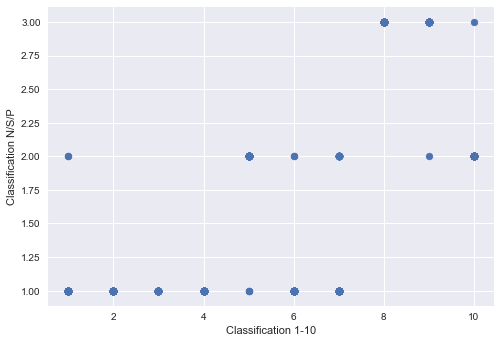

In [9]:
my_xticks = np.array([1,2,3,4,5,6,7,8,9,10])
my_yticks = np.array([1,2,3])
sns.plt.scatter(data['Class code (1 to 10) for classes A to SUSP'], data['Normal=1; Suspect=2; Pathologic=3'])
sns.plt.xlabel('Classification 1-10')
sns.plt.ylabel('Classification N/S/P')
sns.plt.show()

### Taking the strongly correlated fields from subset 1

In [10]:
data.describe()

,start instant,end instant,baseline value (medical expert),baseline value (SisPorto),accelerations (SisPorto),foetal movement (SisPorto),uterine contractions (SisPorto),percentage of time with abnormal short term variability (SisPorto),mean value of short term variability (SisPorto),percentage of time with abnormal long term variability (SisPorto),...,calm vigilance,active vigilance,shift pattern (A or Susp with shifts),accelerative/decelerative pattern (stress situation),decelerative pattern (vagal stimulation),largely decelerative pattern,flat-sinusoidal pattern (pathological state),suspect pattern,Class code (1 to 10) for classes A to SUSP,Normal=1; Suspect=2; Pathologic=3
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,878.439793,1702.877234,133.303857,133.303857,2.722484,7.241298,3.659925,46.990122,1.332785,9.84666,...,0.024929,0.038100,0.033866,0.156162,0.118532,0.050329,0.032455,0.092662,4.509878,1.304327
std,894.084748,930.919143,9.840844,9.840844,3.560850,37.125309,2.847094,17.192814,0.883241,18.39688,...,0.155947,0.191482,0.180928,0.363094,0.323314,0.218675,0.177248,0.290027,3.026883,0.614377
min,0.000000,287.000000,106.000000,106.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,55.000000,1009.000000,126.000000,126.000000,0.000000,0.000000,1.000000,32.000000,0.700000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
50%,538.000000,1241.000000,133.000000,133.000000,1.000000,0.000000,3.000000,49.000000,1.200000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000
75%,1521.000000,2434.750000,140.000000,140.000000,4.000000,2.000000,5.000000,61.000000,1.700000,11.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000
max,3296.000000,3599.000000,160.000000,160.000000,26.000000,564.000000,23.000000,87.000000,7.000000,91.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,3.000000


In [11]:
X = data.drop(['Normal=1; Suspect=2; Pathologic=3','of the examination','of CTG examination'],1)
y = pd.factorize(data['Normal=1; Suspect=2; Pathologic=3'].values)[0].reshape(-1, 1)
y

array([[0],
       [1],
       [1],
       ..., 
       [0],
       [0],
       [1]], dtype=int64)

In [37]:
def findPCAscoreKNN(n_components):
    pca = PCA(n_components=n_components,whiten='True')
    X_transformed = pca.fit(X).transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=21)
    knn = KNeighborsClassifier()
    knn.fit(X_train,y_train)
    return knn.score(X_test,y_test)

def findPCAscoreRandomForest(n_components):
    pca = PCA(n_components=n_components,whiten='True')
    X_transformed = pca.fit(X).transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=21)
    rfr = RandomForestClassifier(n_estimators = 100, n_jobs = 1, 
                                         random_state = 2016, verbose = 1,
                                         class_weight='balanced',oob_score=True)
    rfr.fit(X_train,y_train.ravel())
    return rfr.score(X_test,y_test)

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

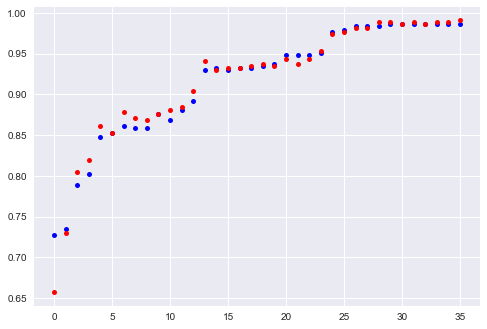

In [40]:
for number in range(len(X.columns)):
    #print ("For number of dimentions "+ str(number+1) +" Score = "+ str(findPCAscoreKNN(number+1)))
    #plt.plot(number, findPCAscoreKNN(number+1),'ro')
    plt.figure(1)    
    plt.plot(number, findPCAscoreKNN(number+1),color='green', linestyle='dashed', marker='o',
    markerfacecolor='blue', markersize=5)
    plt.plot(number, findPCAscoreRandomForest(number+1),'ro',markersize=5)
plt.show()